# Pandas tutorial

Pandas est une librairie python qui permet de traiter des jeux de données.
Ce module contient des fonctions pour lire, nettoyer, manipuler et analyser des données.
En pratique, les données manipulées sont essentiellement issues d'un tableau. 


Il a été crée en 2008 par Wes McKinney et le nom contient deux références aux termes :
* Panel Data
* Python Data Analysis

Code : 
* dépôt github [pandas](https://github.com/pandas-dev/pandas)
* installation via pip
* Import classique
import pandas


Exemple

In [ ]:
pip install pandas

In [ ]:

import pandas as pd

mydataset = {
  'Marques': ["BMW", "Volvo", "Ford"],
  'En stock': [3, 7, 2]
}

myvar = pd.DataFrame(mydataset)
print(myvar)


Pandas va permettre de manipuler plusieurs types de données spécifiques :
* Séries
* DataFrame


## Les séries

Les séries : tableau 1d qui correspondant à une colonne d'un tableur, de données de n'importe quel type.

Exemple :


In [ ]:
import pandas as pd
a = [1, 7, 2]
myvar = pd.Series(a)
print(myvar)

Si on ne précise rien, les valeurs sont étiquetées avec leur numéro d'indice :

In [ ]:
print(myvar[0])

### Création de labels

On peut créer ses propres labels à l'aide du mot-clé index. 

Exemple : 

In [ ]:
import pandas as pd

a = [1, 7, 2]

myvar = pd.Series(a, index = ["x", "y", "z"])

print(myvar,'\n')
print(myvar["y"])

### Création de séries à partir d'un dictionnaire
On peut créer une série à partir d'un dictionnaire, c'est à dire à partir de données listées par /clés/valeurs 

In [ ]:
import pandas as pd

calories = {"day1": 420, "day2": 380, "day3": 390}

myvar = pd.Series(calories)
print(myvar,'\n')

myvar = pd.Series(calories, index = ["day1", "day2"])
print(myvar)

## Les DataFrames
Il s'agit de tableaux multi-dimensionnels. On a vu que les séries correspondaient à une colonne, les DataFrames représentent tout le tableau. 


In [ ]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

myvar = pd.DataFrame(data)
print(myvar)

Les DataFrames sont définies comme des tableaux avec des lignes et des colonnes; On peut donc identifier une ligne particulière.

L'attribut loc remplit ce rôle :

In [ ]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data)
print(df, '\n')
# 0 : index de ligne 
print(df.loc[0])


Cela renvoie naturellement une série pandas. 
On peut extraire plusieurs lignes, indexées avec []

In [ ]:
#use a list of indexes:
print(df.loc[[0, 1]])

Le résultat est aussi un DataFrame. 
On peut renommer chaque ligne :

In [ ]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])
print(df, '\n') 

#Extraire une seule ligne

print(df.loc["day2"])

Lecture d'un fichier et stockage sous forme de DataFrame. On peut charger en mémoire les fichiers au format CSV très facilement :

In [ ]:
import pandas as pd

df = pd.read_csv('../data/data.csv')
print(df) 

# Pour afficher tout le tableau si celui-ci est gros 
print(df.to_string()) 

## Analyse des DataFrames

* La méthode head() permet d'afficher les entêtes et un nombre spécifique de lignes en débutant depuis le haut du tableau 
(par défaut les 5 premières lignes)
* La méthode tail() permet d'afficher les entêtes et un nombre spécifique de lignes en partant de la fin du tableau 
(par défaut les 5 dernières lignes)
* La méthode info() permet d'afficher des informations à propos du jeu de données. 

In [ ]:
import pandas as pd
df = pd.read_csv('../data/data.csv')
print(df.head(10)) 
print(df.tail(10)) 
print(df.info) 


## Nettoyage des données 

Cette action vise à supprimer :
* les cellules vides, 
* les données qui n'ont pas le bon format,
* données "fausses",
* données dupliquées 
qui peuvent fausser les analyses statistiques faites sur le jeu de données. 

#### Suppression des lignes

Pour les celulles vides, la solution consiste à supprimer la ligne avec la méthode dropna(). Cette méthode détecte automatiquement les cellules vides et supprime les lignes correspondantes. 
---> Cela retourne un nouveau DataFrame sans modifier l'original. 
---> Pour le modifier explicitement, il faut utiliser l'argument inplace = True

In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')
new_df = df.dropna()
print(new_df.to_string())

#  Remplacement du DataFrame 
df.dropna(inplace = True)
print(df.to_string()) 

### Remplacement des cellules vides par une valeur 
* La méthode fillna() permet de remplacer une case vide par une valeur arbitraire passée en argument 
* Vous pouvez ne préciser qu'une seule colonnes  

In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
df.fillna(130, inplace = True) 

# On précise le nom de la colonne 
df["Calories"].fillna(130, inplace = True) 

### Remplacement d'une cellule vide par un calcul 
* moyenne : mean()
* médiane : median()
* mode (valeur la plus fréquente) : mode() 

On constate que le module pandas fournit des fonctions de calcul statistique.

In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
# Moyenne des valeurs de la colonne "calories"
x = df["Calories"].mean()

df["Calories"].fillna(x, inplace = True) 

### Traitement de mauvais format de données 
2 solutions :

* Effacer la ligne  (comme précédemment)
* Convertir les données au même format 


#### Effacer une ligne qui contient une donnée incorrecte 
Méthode .drop()

Arguments :
* index des lignes à effacer 
* axe (lignes ou colonnes)
* inplace : remplace les données

In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
df.drop([5,6], axis=0, inplace=True)
print(df.to_string())


# Suppression par index 
df.drop(df[(df['Unit_Price'] > 400) & (df['Unit_Price'] < 600)].index)


In [ ]:
#### Convertir des données : format date  

Pour convertir des données de date au même format : méthode to_datetime() 

In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
df['Date'] = pd.to_datetime(df['Date'])

print(df.to_string())

### Données fausses 
* mauvaise saisie, etc ...

* plusieurs choix (déjà vu précédemment) 
  * effacer la ligne 
  * remplacer la valeur fausse

Pour des gros jeux de données : automatisation du traitement 


In [ ]:
# Remplacement
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.loc[x, "Duration"] = 120
# Suppression de lignes 
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.drop(x, inplace = True) 

### Supprimer les doublons 

Pour supprimer les doublons on peut utiliser la méthode duplicate(); Cette méthode renvoie un booléen Vrai si la ligne est dupliquée. 
Pour supprimer la ligne dupliquée, on utilise la méthode drop_duplicates()

In [ ]:
print(df.duplicated())
df.drop_duplicates(inplace = True) 

## Analyse de données
* On a vu le calcul de la moyenne et de la médiane d'une colonne
* On peut calculer des corrélations avec la méthode corr()
* Elle ignore les colonnes de données "non-numériques"
* Le résultat est une "matrice" de corrélation entre les colonnes, variant de -1 à 1 

In [ ]:
import pandas as pd

df = pd.read_csv('../data/data.csv')
print(df.corr()) 

## Exercice 

Le fichier data.csv contient des cellules avec une valeur NaN dans une colonne. 
Supprimer les lignes qui contiennent des NaN dans le fichier data.csv et calculer la moyenne de cette colonne. 

* Ouvrir et analyser visuellement le fichier
* Calculer l'index des lignes qui contiennent un NaN 
* Supprimer les lignes correspondantes 
* Calculer la moyenne de la colonne 

# Module Matplotlib 

+ une des bibliothèques python les plus utilisées pour représenter des graphiques en 2D
+ contient beaucoup de fonctionnalités
+ installation avec le programme **pip**

In [ ]:
python3 -m pip install --user -U --upgrade pip
python3 -m pip install --user -U matplotlib

Importer le module dans notre programme

In [ ]:
import matplotlib.pyplot as plt

## Utiliser les commandes *plot*, *show* et *close*

In [ ]:
import matplotlib.pyplot as plt

plt.plot()
plt.show()
plt.close()

# I. Tracé de courbes 2D : la commande *plot()*

+ Elle peut ne prendre aucun argument (et ne fait rien)
+ prend une liste en argument : [a, b, c]
  + va relier le points A(0, a) au point B(1, b) et le point B au point C(2, c)

In [ ]:
plt.plot([0, 1, 2])

In [ ]:
plt.show()

In [ ]:
plt.savefig("graphique.png") # Sauve la figure


+ On peut passer deux listes en arguments x = [0, 1, 2] et y = [1, 0, 2]
+ plt.plot(x,y) va tracer les ordonnées y en fonctions des abcisses x

Exercice : tracer un triangle fermé qui passe par les points (0,0) (1,1) et (-1,1)


#### Superposition des plots

+ On peut utiliser plusieurs fois la commande 

In [ ]:
import matplotlib.pyplot as plt

x = [0, 1, 0]
y = [0, 1, 2]

x1 = [0, 2, 0]
y1 = [2, 1, 0]

x2 = [0, 1, 2]
y2 = [0, 1, 2]

plt.plot(x, y)
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()
plt.close()

+ Lui passer plusieurs couples de données en arguments

In [ ]:
import matplotlib.pyplot as plt

x = [0, 1, 0]
y = [0, 1, 2]

x1 = [0, 2, 0]
y1 = [2, 1, 0]

x2 = [0, 1, 2]
y2 = [0, 1, 2]

plt.plot(x, y, x1, y1, x2, y2)
plt.show()
plt.close()

#### Personnalisation

On peut personnaliser les graphiques en changeant les titres, les axes, les légendes, le type de ligne avec des mots clés :

- title
- label
- legend
- color

A placer avant la commande *show*

Exemple 

In [ ]:
import matplotlib.pyplot as plt

x = [0.25, 0.25, 1.25, 0.5, 1, 0.25, 0.6, 0, -0.6, -0.25, -1, -0.5, -1.25, -0.25, -0.25, 0.25]
y = [0, 0.5, 0.5, 1, 1, 1.5, 1.5, 2, 1.5 , 1.5, 1, 1, 0.5, 0.5, 0, 0]
plt.plot(x, y, '-.', color = "green", lw = 2)
plt.title("Mon beau sapin")
plt.axis('equal')
plt.xlabel("C'est Noel")
plt.ylabel("Vive le vent")
plt.show()
plt.close()

#### Tracés des fonctions avec plot

+ Import de la fonction cosinus depuis le module *numpy*


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 2 * np.pi, 0.01) # On crée un array qui va de 0 à 2pi exclu avec un pas de 0.01
plt.plot(x, np.cos(x)) # On utilise plot avec l'array x et l'array cos(x)
plt.show()
plt.close()

In [ ]:
+ Tracé d'une fonction définie par l'utilisateur

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 2 * np.pi, 0.01) # On crée un array qui va de 0 à 2pi exclu avec un pas de 0.01
y1=x**2
y2=2*x+2
plt.plot(x, y1, x, y2) # On utilise plot avec l'array x et y1 (tracé 1) et ensuite avec x et y2 
plt.show()
plt.close()

In [ ]:
Exercice : tracé la fonction sinus(3*pi*x) pour x entre 0 et 100 

In [ ]:
# Tracé d'un nuage de points : la commande *scatter()*

+ Arguments :
    * Deux tableaux de même dimension : les abcisses et les ordonnées 
    * c : couleur
    * label : légende
    * ...

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

plt.scatter(x, y, c='cyan', label='Données fixées arbitraiement')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Génération de 20 flottants aléatoires 
x1 = pd.Series(np.random.rand(20) - 0.5)
y1 = pd.Series(np.random.rand(20) - 0.5)

x2 = pd.Series(np.random.rand(20) + 0.5)
y2 = pd.Series(np.random.rand(20) + 0.5)

# Personnalisation du graphe
plt.title('Scatter Plot')
plt.ylabel('Range of y values')
plt.xlabel('Range of x values')

# plot
plt.scatter(x1, y1, c='cyan', label='Données aléatoires -0.5')  # 'c' parameter is the colour and 'label' is the text for the legend
plt.scatter(x2, y2, c='blue', label='Données aléatoires +0.5')

plt.legend(loc=4)  # Position de la légende : 1,2,3 and 4 = top-right, top-left, bottom-left et bottom-right
# Affichage du graphique
plt.show()


# Tracé d'histogrammes : la commande *bar()*

+ Arguments : 
  + liste des coordonnées x (array)
  + Valeurs de heuteur de barres (array)
  + Largeur des barres
  + Bottom (defaut=0)
  + align='center' 



In [ ]:
import matplotlib.pyplot as plt
x = [10,10,20,20,20,30,30,30,40,40]
x1 = [10,20,30,40]
y1 = [2,3,3,2]
plt.bar(x1, y1, width=2.8, color='r', edgecolor='w') 
plt.show()

In [ ]:
# Tracé d'histogrammes : la commande *hist()*

+ Calcul automatique de la fréquence
+ Arguments
  + liste des données 
  + Nombre d'intervalles

In [ ]:
import matplotlib.pyplot as plt
x = [10,10,20,20,20,30,30,30,40,40]
plt.hist(x,4, color='g') # 4 nombre d'intervalles (arg. bins)
plt.show()


#### Personnalisation de l'histogramme


In [ ]:
import matplotlib.pyplot as plt
x = [10,10,20,20,20,30,30,30,40,40]
plt.hist(x,4 ,edgecolor = 'white', color='green')
plt.xticks([10,20,30,40])
plt.show()

# TP 

#### Exercice 1.
Réaliser le graphe de la fonction $y(t) = v0t − \frac{1}{2} gt^2$ pour v0 = 10, g = 9.81, et $t \in [0, 2v0 / g]. 

Le label sur l’axe des x devra être “temps (s)” et le label sur l’axe des y “hauteur (m)”.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
v0=10.
g=9.81
t = np.arange(0, 2*v0/g, 0.1)
y=v0*t -0.5*g*t**2
plt.plot(t,y)
plt.xlabel("temps (s)")
plt.ylabel("hauteur (m)")
plt.show()

In [ ]:
Exercice 2

* Créer une figure qui trace 
  * à gauche un nuage de flottants aléatoires (x,y)
  * à droite le nuage de points (x, sin(y)) 
Astuce : utiliser la commande subplot

# La librairie Seaborn 

* Librairie de visualisation basée sur matplotlib 
* Faite pour le tracé de données statitiques
* Bien adaptées aux structures de données pandas, elle ajoute une interaction avec les data frames afin de faciliter grandement la génération de graphiques à partir de ceux-ci; 
Seaborn automatise la création de figures multiples.
propose un catalogue – très – dense de fonctions graphiques pour répondre le plus précisément possible à une problématique donnée.
Matplotlib offre une flexibilité accrue en termes de customisation et des performances parfois supérieures.
Il peut donc s’agir d’une meilleure option dans certaines situations.
* Seaborn apporte une variété de thèmes et de couleurs plus importants qui permettent un rendu de meilleure qualité (darkgrid, whitegrid, dark, white, and ticks)

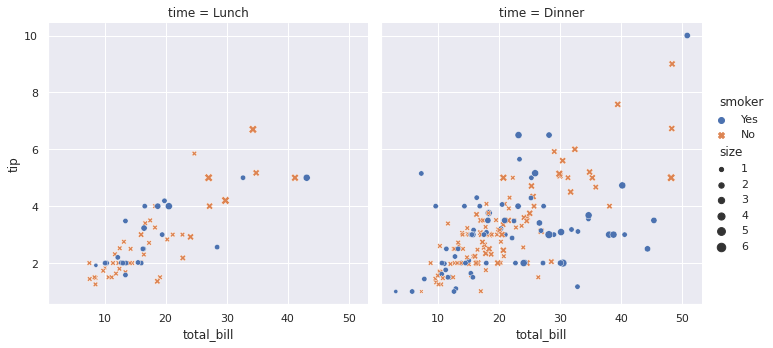

In [8]:
# Import seaborn
import seaborn as sns
import pandas as pd

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)


Dans un premier temps, on définit le data frame qui va être utilisé pour tracer le graphique, via l’argument  data;
load_dataset() : charge des exemples depuis un dépôt sous forme de DataFrames pandas
    
    
    ensuite, il suffit de fixer les variables du data 
    frame défini, à mettre en abscisse et en ordonnée.

In [3]:
# Import seaborn
import seaborn as sns
import pandas as pd

# Load an example dataset
tips = sns.load_dataset("tips")
print(tips.head(10)) 
fmri = sns.load_dataset("fmri")
print(fmri.head(10)) 

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970
5      s9         18  stim  parietal -0.103513
6      s8         18  stim  parietal -0.064408
7      s7         18  stim  pa

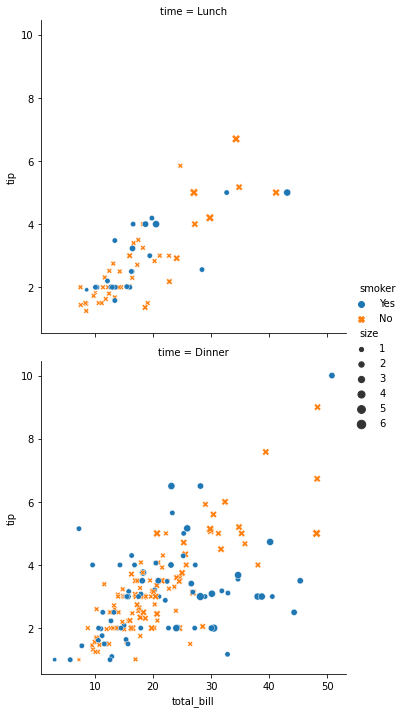

In [4]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", row="time",
    hue="smoker", style="smoker", size="size",
)


In [ ]:
La méthode relplot() permet de tracer des "relations entre les données"
* Arguments :
  * data, x, y 
  * col, row : fait un subplot suivant la valeur indiquée, en colonne ou en ligne
  * palette 
  * hue, style : couleur et style par type de données
  * size : ajoute une information donnée par un autre type de données 

* Reprend les fonctions scatter et lineplot déjà vues

In [ ]:
scatter plot par catégorie 

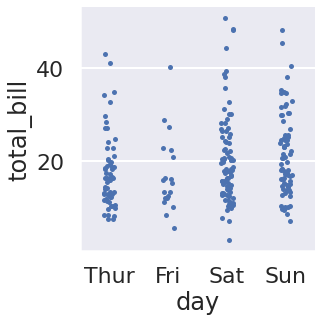

In [44]:
tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill")


In [ ]:
Certaines fonctions contiennent un traitement statistique 
* relplot avec des données qui dépendent d'un index temps : tracé de la moyenne et de l'écart-type 
revoir ca avec index 
https://towardsdatascience.com/master-a-third-of-seaborn-statistical-plotting-with-relplot-df8642718f0f

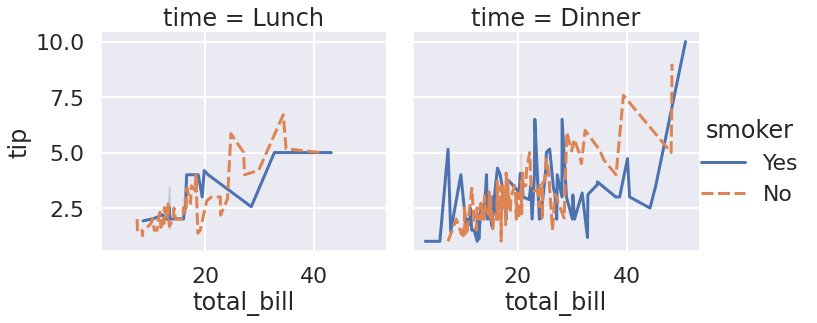

In [38]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

In [ ]:
Statistical estimation in seaborn goes beyond descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using lmplot():

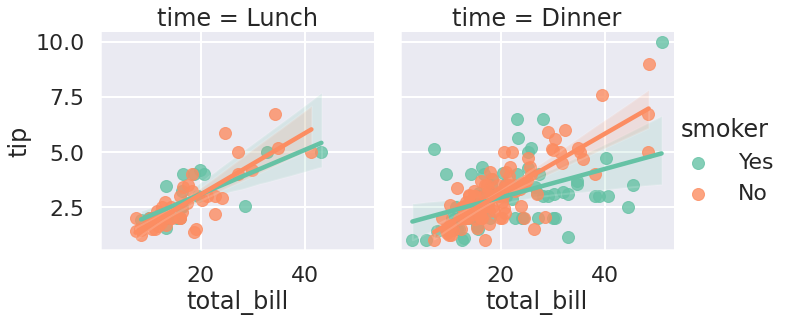

In [42]:
# lmplot : scatterplot by including a linear regression model (and its uncertainty) 
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", palette='Set2')


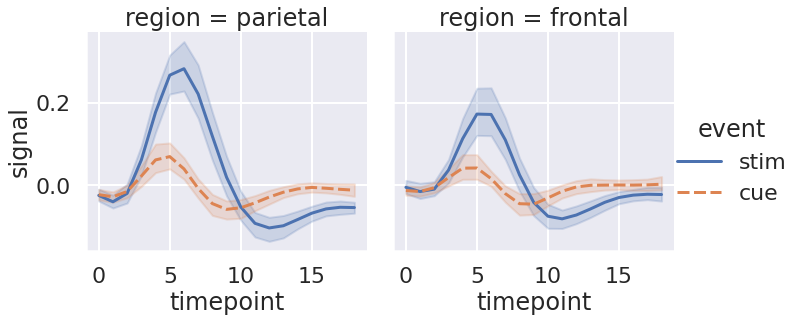

Distributional representations
Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function displot() supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

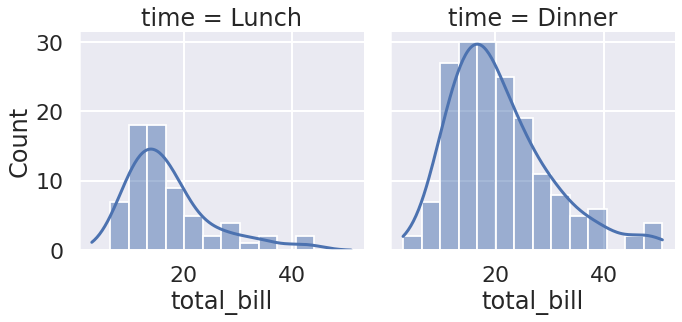

In [40]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

In [ ]:
Vues multiples : jointplot()
* Arguments :
      * 

In [ ]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

In [ ]:
Along with similar, but perhaps less familiar, options such as kernel density estimation:

sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")


In [ ]:
 plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

In [ ]:
pairplot() is similar — it combines joint and marginal views — but rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously:

sns.pairplot(data=penguins, hue="species")

## Preciser mieux ce que c'est 

Personnalisation 
* Thème
* Contexte The four preset contexts, in order of relative size, are paper, notebook, talk, and poster. The notebook style is the default, and was used in the plots above.
* Fig sizes dans les subplots automatiques 

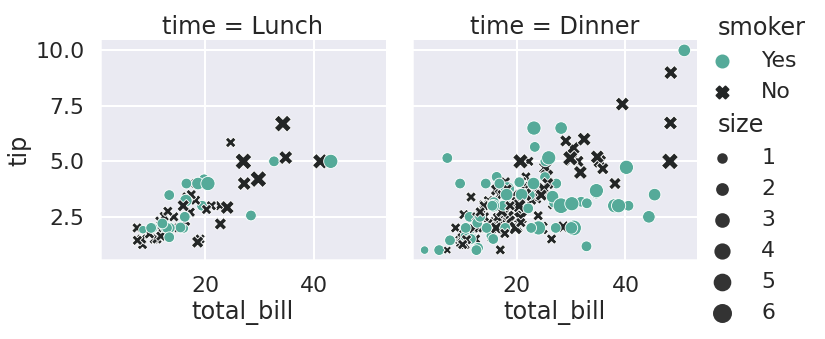

In [30]:
# Import seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#sns.set_context("poster")
sns.color_palette('husl') #pastel,  husl, Set2, Spectral, light:#5A9
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size", palette='dark:#5A9_r',
)

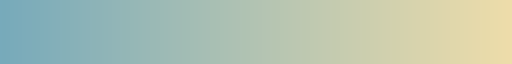

In [32]:
#Return a blend gradient between two endpoints:
sns.color_palette("blend:#7AB,#EDA", as_cmap=True)

In [ ]:
Exercice 

In [ ]:
prets = pd.read_csv('https://raw.githubusercontent.com/benjaminmrl/data-4452741/main/prets_final.csv')

prets.head()
CA['date'] = pd.to_datetime(CA['date'])
CA.head()



In [ ]:

- une courbe a été tracée pour chaque type de prêt, de dimension 3
- la légende est apparente
- le titre de l'axe des ordonnées a été ajouté
- la police des graduations (ticks) a été fixée à 11
- la police du titre a été fixée à 14
- le quadrillage apparait en gris, avec une taille de 0.5

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(CA['date'], CA['immobilier'], label='immobilier', linewidth=3)
plt.plot(CA['date'], CA['automobile'], label='automobile', linewidth=3)
plt.plot(CA['date'], CA['consommation'], label='consommation', linewidth=3)
plt.legend(loc='upper right')
plt.ylabel('Benefice net (€)', fontsize=13)
plt.yticks(fontsize=11)
plt.title("Bénéfices mensuels nets sur l'année 2021, par type de prêt", fontsize=14)
plt.xticks(['2021-03','2021-06','2021-09', '2021-12'], fontsize=11)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
proportion de prêt par type de prêt.
b
Pour réaliser ce graphique, vous pouvez naturellement ré-utiliser l'agrégation, mais le mieux est de laisser travailler seaborn, en utilisant la fonction countplot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

prets = pd.read_csv('https://raw.githubusercontent.com/benjaminmrl/data-4452741/main/prets_final.csv')

#prets.head()

sns.countplot(data=prets, x='type')
plt.show()

In [ ]:
2. bénéfice mensuel réalisé en fonction du revenu du client - prêts immobiliers

Pour ce graphique, vous ajouterez simplement en couleur l'information de l'agence où a été réalisé le prêt

In [ ]:
sns.scatterplot(data=prets, x='revenu', y='benefices', hue='ville')
plt.show()

In [ ]:
3. La distribution des bénéfices réalisés

Nous souhaitons avoir un histogramme classique et un à densité. Vous aurez besoin des fonctions :

    histplot pour l'histogramme
    kdeplot pour le diagramme à densité


In [ ]:
4. bénéfice mensuel total réalisé par agence

Pour ce graphique, on souhaite avoir 2 barres par ville : une pour chaque type de prêt